Total Users: 3


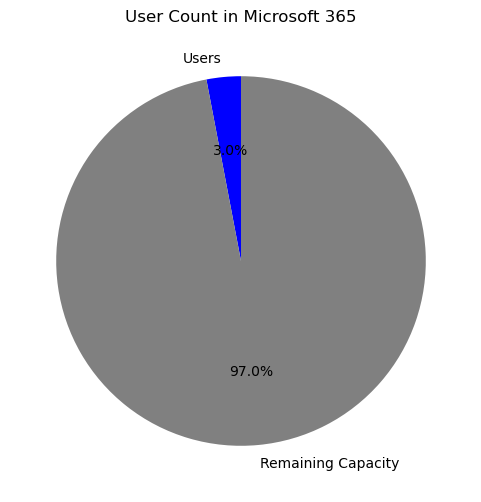

In [16]:
import requests
import matplotlib.pyplot as plt
import json
import os

# Load credentials from config.json
CONFIG_PATH = "./config.json"
if not os.path.exists(CONFIG_PATH):
    raise FileNotFoundError("Configuration file not found. Run the PowerShell script first.")

with open(CONFIG_PATH, "r") as config_file:
    config = json.load(config_file)

TENANT_ID = config.get("tenant_id", "")
CLIENT_ID = config.get("client_id", "")
CLIENT_SECRET = config.get("client_secret", "")
GRAPH_URL = "https://graph.microsoft.com/v1.0"
TOKEN_URL = f"https://login.microsoftonline.com/{TENANT_ID}/oauth2/v2.0/token"

# Get Access Token
def get_access_token():
    data = {
        'grant_type': 'client_credentials',
        'client_id': CLIENT_ID,
        'client_secret': CLIENT_SECRET,
        'scope': 'https://graph.microsoft.com/.default'
    }
    response = requests.post(TOKEN_URL, data=data)
    response.raise_for_status()
    return response.json()["access_token"]

# Get User Statistics
def get_users_count(access_token):
    headers = {"Authorization": f"Bearer {access_token}"}
    response = requests.get(f"{GRAPH_URL}/users", headers=headers)
    response.raise_for_status()
    users = response.json()
    return len(users.get("value", []))

# Plot Statistics
def plot_statistics(user_count):
    labels = ['Users', 'Remaining Capacity']
    values = [user_count, 100 - user_count]  # Assuming a total of 100 for demo purposes
    
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'grey'])
    plt.title("User Count in Microsoft 365")
    plt.show()

try:
    token = get_access_token()
    user_count = get_users_count(token)
    print(f"Total Users: {user_count}")
    plot_statistics(user_count)
except Exception as e:
    print(f"Error: {e}")